In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz # Required to visualise Random Forest
import pydotplus

In [2]:
#!pip install pydotplus #-  Required to visualise decision tree

    100% |████████████████████████████████| 286kB 11.9MB/s ta 0:00:01
  Stored in directory: /tmp/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
data = pd.read_csv("../input/train_data.csv",header = None)
df_test = pd.read_csv("../input/test_data.csv",header = None)
df= pd.DataFrame(data)
data.info()
data.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
0     16281 non-null int64
1     16281 non-null object
2     16281 non-null int64
3     16281 non-null object
4     16281 non-null int64
5     16281 non-null object
6     16281 non-null object
7     16281 non-null object
8     16281 non-null object
9     16281 non-null object
10    16281 non-null int64
11    16281 no

In [5]:
df.columns = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']
df_test.columns = ['age','workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']

In [6]:
df.head()

age          workclass   ...    native.country  income
0   39          State-gov   ...     United-States   <=50K
1   50   Self-emp-not-inc   ...     United-States   <=50K
2   38            Private   ...     United-States   <=50K
3   53            Private   ...     United-States   <=50K
4   28            Private   ...              Cuba   <=50K

[5 rows x 15 columns]

In [7]:
df_test.head()

age   workclass  fnlwgt   ...    hours.per.week  native.country   income
0   25     Private  226802   ...                40   United-States   <=50K.
1   38     Private   89814   ...                50   United-States   <=50K.
2   28   Local-gov  336951   ...                40   United-States    >50K.
3   44     Private  160323   ...                40   United-States    >50K.
4   18           ?  103497   ...                30   United-States   <=50K.

[5 rows x 15 columns]

In [8]:
#Converting Categorical variables into Quantitative variables
print(set(data['occupation']))
data['occupation'] = data['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

df_test['occupation'] = df_test['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)


{' Craft-repair', ' Adm-clerical', ' Handlers-cleaners', ' Transport-moving', ' ?', ' Farming-fishing', ' Armed-Forces', ' Machine-op-inspct', ' Exec-managerial', ' Tech-support', ' Priv-house-serv', ' Sales', ' Other-service', ' Protective-serv', ' Prof-specialty'}


In [ ]:
#print(set(data['income']))
#data['income'] = data['income'].map({ 0: ' <=50K', 1: ' >50K'}).astype('category')
#print(set(df['income']))
#df['income'] = df['income'].map({ 0: ' <=50K', 1: ' >50K'}).astype('category')

In [9]:
data['sex'] = data['sex'].map({' Male': 0, ' Female': 1}).astype(int)
df_test['sex'] = df_test['sex'].map({' Male': 0, ' Female': 1}).astype(int)

In [10]:
data['race'] = data['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)
df_test['race'] = df_test['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [11]:
data['marital.status'] = data['marital.status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
df_test['marital.status'] = df_test['marital.status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [12]:
df.isnull().values.any()
df_test.isnull().values.any()

False

In [ ]:
#df.occupation.replace(0, np.nan, inplace=True)

In [13]:
print(df.shape)
df=df.dropna()
print(df.shape)

print(df_test.shape)
df_test=df_test.dropna()
print(df_test.shape)

(32561, 15)
(32561, 15)
(16281, 15)
(16281, 15)


In [14]:
df.head(10)

age          workclass   ...    native.country  income
0   39          State-gov   ...     United-States   <=50K
1   50   Self-emp-not-inc   ...     United-States   <=50K
2   38            Private   ...     United-States   <=50K
3   53            Private   ...     United-States   <=50K
4   28            Private   ...              Cuba   <=50K
5   37            Private   ...     United-States   <=50K
6   49            Private   ...           Jamaica   <=50K
7   52   Self-emp-not-inc   ...     United-States    >50K
8   31            Private   ...     United-States    >50K
9   42            Private   ...     United-States    >50K

[10 rows x 15 columns]

In [15]:
df_test.head()

age   workclass  fnlwgt   ...    hours.per.week  native.country   income
0   25     Private  226802   ...                40   United-States   <=50K.
1   38     Private   89814   ...                50   United-States   <=50K.
2   28   Local-gov  336951   ...                40   United-States    >50K.
3   44     Private  160323   ...                40   United-States    >50K.
4   18           ?  103497   ...                30   United-States   <=50K.

[5 rows x 15 columns]

                     age    fnlwgt       ...        capital.loss  hours.per.week
age             1.000000 -0.076646       ...            0.057775        0.068756
fnlwgt         -0.076646  1.000000       ...           -0.010252       -0.018768
education.num   0.036527 -0.043195       ...            0.079923        0.148123
marital.status -0.491840  0.034948       ...           -0.069880       -0.168237
occupation     -0.042341  0.009498       ...           -0.005380        0.036221
race            0.024663 -0.098836       ...            0.017994        0.051965
sex            -0.088832 -0.026858       ...           -0.045567       -0.229309
capital.gain    0.077674  0.000432       ...           -0.031615        0.078409
capital.loss    0.057775 -0.010252       ...            1.000000        0.054256
hours.per.week  0.068756 -0.018768       ...            0.054256        1.000000

[10 rows x 10 columns]


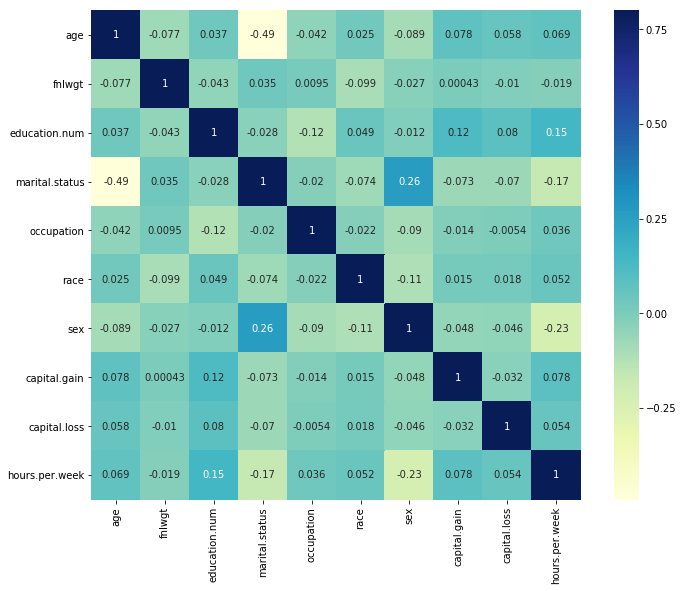

In [16]:
hmap = df.corr()
print(hmap)
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="YlGnBu", square=True);

In [ ]:
#Feature selection and applying random forest has to be proceeded

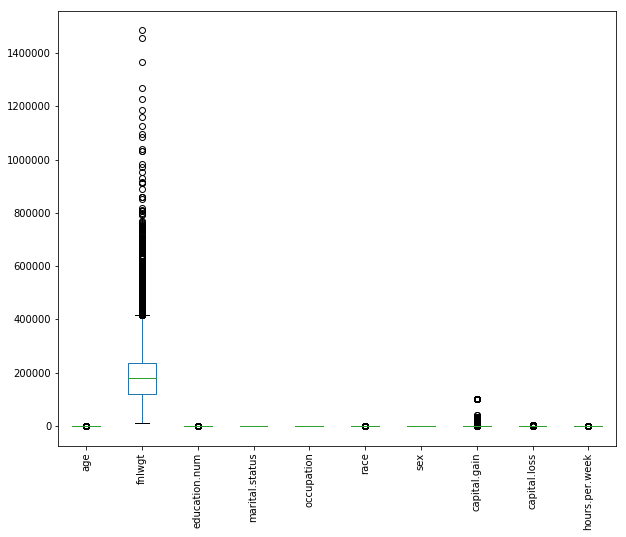

In [17]:
df.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8),rot=90)

The Above plot shows that fnlwgt has more outliers and the information that can be gained from this feature is very little as the correlation between fnlwgt and target is very low. Therefore removing this feature from training our model

In [18]:
# Data Prep - dropping fnlwgt
#df = df.drop(columns = ['fnlwgt'])
#Converting objects to category
for i in df.select_dtypes('object'):
    df[i] = df[i].astype('category')

#Converting objects to category
for i in df_test.select_dtypes('object'):
    df_test[i] = df_test[i].astype('category')

adult_data = df.drop(columns = ['income'])
adult_label = df.income

test_adult_data = df_test.drop(columns = ['income'])
test_adult_label = df_test.income

adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

test_adult_cat_1hot = pd.get_dummies(test_adult_data.select_dtypes('category'))
test_adult_non_cat = test_adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')
test_adult_data_1hot = pd.concat([test_adult_non_cat, test_adult_cat_1hot], axis=1, join='inner')


In [19]:
# Test Label cleaning
test_adult_label = test_adult_label.map({' <=50K.': ' <=50K', ' >50K.': ' >50K'}).astype('category')

#Checking if number of columns are equal in both dataset as we are using one hot encoder
print(test_adult_data_1hot.columns.difference(adult_data_1hot.columns))
print(adult_data_1hot.columns.difference(test_adult_data_1hot.columns))

# Including the feature that was absent in the test data after 1hot
test_adult_data_1hot['native.country_ Holand-Netherlands'] = 0

Index([], dtype='object')
Index(['native.country_ Holand-Netherlands'], dtype='object')


In [ ]:
# Testing
#test_adult_data_1hot.info()
#adult_data_1hot.info()
#adult_label.head()
#test_adult_label.head()
#test_adult_data_1hot.columns.difference(adult_data_1hot.columns)
# #Testing
# #adult_data_1hot.info()
# test_adult_data_1hot['native.country_ Holand-Netherlands']
# for i in adult_data_1hot.columns:
#     if i not in test_adult_data_1hot.columns:
#         print(i)


In [20]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc[' >50K',' >50K']
    TN = confusion.loc[' <=50K',' <=50K']
    FP = confusion.loc[' <=50K',' >50K']
    FN = confusion.loc[' >50K',' <=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

In [21]:
############ Training on Full Dataset using RandomForest and checking the accuracy ############
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(adult_data_1hot, adult_label)
r_forest_gini_pred = r_forest_gini.predict(test_adult_data_1hot)
rforest_gini = model_eval(test_adult_label, r_forest_gini_pred)

print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(adult_data_1hot, adult_label)
r_forest_entropy_pred = r_forest_entropy.predict(test_adult_data_1hot)
rforest_entropy = model_eval(test_adult_label, r_forest_entropy_pred)
print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

#printmd('### 3.4.1.2. Model Evaulation ')
ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 85.41 percent.
Random Forest using Entropy : 85.40 percent.


accuracy  error_rate     ...       sensitivity  specificity
rforest_gini       0.8541      0.1459     ...            0.5211       0.9571
rforest_entropy    0.8540      0.1460     ...            0.5221       0.9567

[2 rows x 7 columns]

In [22]:
#Visualising Random Forest
# Extract single tree
estimator = r_forest_gini.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = adult_data_1hot.columns,
                class_names = list(set(adult_label)),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [23]:
############ Training on Full Dataset using DecisionTree and checking the accuracy ############
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(adult_data_1hot,adult_label)
#Predict the response for test dataset
y_pred = clf.predict(test_adult_data_1hot)
dTree = model_eval(test_adult_label, y_pred)
print('DecisionTree: %.2f percent.' % (round(dTree['accuracy']*100,2)))
ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)

DecisionTree: 79.74 percent.


accuracy  error_rate     ...       sensitivity  specificity
dTree    0.7974      0.2026     ...            0.5788        0.865

[1 rows x 7 columns]

In [ ]:
#Decision Tree Visualisation
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [ ]:
# Normalisation of data is not required for random forest or decision tree classifiers - The model only needs the absolute values for classification
# # Normalization
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  

# # Fitting only on training data
# scaler.fit(train_data)  
# train_data_norm = scaler.transform(train_data)  

# # Applying same transformation to test data
# test_data_norm = scaler.transform(test_data)

# # Normalization
# from sklearn.preprocessing import StandardScaler  
# scaler = StandardScaler()  

# # Fitting only on training data
# scaler.fit(train_data)  
# train_data_norm = scaler.transform(train_data)  

# # Applying same transformation to test data
# test_data_norm = scaler.transform(test_data)

# Normalising the data doesn't change anything in the performance or accuracy of the model

In [24]:
# Function that converts numpy array to a dataframe
def nparray_to_df(prob):
    return pd.DataFrame(data=prob,columns=['Prob <=50K','Prob >50K'])

In [25]:
############ Training on Full Dataset - Probability Calculation ############
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(adult_data_1hot, adult_label)
r_forest_gini_prob = r_forest_gini.predict_proba(adult_data_1hot) #Predict_proba returns a numpy array of probabilities of classes
r_forest_gini_prob = nparray_to_df(r_forest_gini_prob)# Converting to dataframe
r_forest_gini_prob_test = r_forest_gini.predict_proba(test_adult_data_1hot)#For test data
r_forest_gini_prob_test = nparray_to_df(r_forest_gini_prob_test)
# rforest_gini = model_eval(test_adult_label, r_forest_gini_pred)

# print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(adult_data_1hot, adult_label)
r_forest_entropy_prob = r_forest_entropy.predict_proba(adult_data_1hot) #Predict_proba returns a numpy array of probabilities of classes
r_forest_entropy_prob = nparray_to_df(r_forest_entropy_prob)# Converting to dataframe
r_forest_entropy_prob_test = r_forest_entropy.predict_proba(test_adult_data_1hot) #Predict_proba returns a numpy array of probabilities of classes
r_forest_entropy_prob_test = nparray_to_df(r_forest_entropy_prob_test)
# rforest_entropy = model_eval(test_adult_label, r_forest_entropy_pred)
# print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

#printmd('### 3.4.1.2. Model Evaulation ')
# ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
# display(ovl_rf)

In [26]:
r_forest_gini_prob.head()

Prob <=50K  Prob >50K
0    0.885238   0.114762
1    0.628042   0.371958
2    0.977680   0.022320
3    0.915731   0.084269
4    0.464061   0.535939

In [27]:
r_forest_entropy_prob.head()

Prob <=50K  Prob >50K
0    0.800188   0.199812
1    0.618094   0.381906
2    0.976500   0.023500
3    0.908334   0.091666
4    0.460649   0.539351

In [28]:
r_forest_gini_prob_test.head()

Prob <=50K  Prob >50K
0    0.999973   0.000027
1    0.687417   0.312583
2    0.782591   0.217409
3    0.029251   0.970749
4    0.999854   0.000146

In [ ]:
#Test area
#pd.DataFrame(data=r_forest_entropy_prob,
 #                 columns=['Prob <=50K','Prob >50K']).head()


In [29]:
# Training DecisionTree with Knowledge Distillation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(r_forest_gini_prob,adult_label)
#Predict the response for test dataset
y_pred = clf.predict(r_forest_gini_prob_test)
dTree = model_eval(test_adult_label, y_pred)
print('DecisionTree: %.2f percent.' % (round(dTree['accuracy']*100,2)))
ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)
#############################

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(r_forest_entropy_prob,adult_label)
#Predict the response for test dataset
y_pred = clf.predict(r_forest_entropy_prob_test)
dTree = model_eval(test_adult_label, y_pred)
print('DecisionTree: %.2f percent.' % (round(dTree['accuracy']*100,2)))
ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)
################################

DecisionTree: 84.44 percent.


accuracy  error_rate     ...       sensitivity  specificity
dTree    0.8444      0.1556     ...            0.5608       0.9321

[1 rows x 7 columns]

DecisionTree: 84.68 percent.


accuracy  error_rate     ...       sensitivity  specificity
dTree    0.8468      0.1532     ...            0.5972       0.9239

[1 rows x 7 columns]

In [30]:
# Creating a new dataset with one column of probability
adult_data_1hot[r_forest_gini_prob.columns[0]] = r_forest_gini_prob.iloc[:,0]
test_adult_data_1hot[r_forest_gini_prob_test.columns[0]] = r_forest_gini_prob_test.iloc[:,0]


clf = DecisionTreeClassifier()
clf = clf.fit(adult_data_1hot,adult_label)
y_pred = clf.predict(test_adult_data_1hot)
dTree = model_eval(test_adult_label, y_pred)
print('DecisionTree: %.2f percent.' % (round(dTree['accuracy']*100,2)))
ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)

DecisionTree: 77.87 percent.


accuracy  error_rate     ...       sensitivity  specificity
dTree    0.7787      0.2213     ...            0.5637       0.8452

[1 rows x 7 columns]

In [31]:
# Creating a new dataset including two column of probability along with other features
adult_data_1hot[r_forest_gini_prob.columns[1]] = r_forest_gini_prob.iloc[:,1]
test_adult_data_1hot[r_forest_gini_prob_test.columns[1]] = r_forest_gini_prob_test.iloc[:,1]


clf = DecisionTreeClassifier()
clf = clf.fit(adult_data_1hot,adult_label)
y_pred = clf.predict(test_adult_data_1hot)
dTree = model_eval(test_adult_label, y_pred)
print('DecisionTree: %.2f percent.' % (round(dTree['accuracy']*100,2)))
ovl_rf = round(pd.DataFrame([dTree], index = ['dTree']),4)
display(ovl_rf)

DecisionTree: 78.01 percent.


accuracy  error_rate     ...       sensitivity  specificity
dTree    0.7801      0.2199     ...            0.5663       0.8462

[1 rows x 7 columns]